In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

customers_df.head(), products_df.head(), transactions_df.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [3]:
customers_df.isnull().sum(), products_df.isnull().sum(), transactions_df.isnull().sum()

customers_df.dtypes, products_df.dtypes, transactions_df.dtypes


(CustomerID      object
 CustomerName    object
 Region          object
 SignupDate      object
 dtype: object,
 ProductID       object
 ProductName     object
 Category        object
 Price          float64
 dtype: object,
 TransactionID       object
 CustomerID          object
 ProductID           object
 TransactionDate     object
 Quantity             int64
 TotalValue         float64
 Price              float64
 dtype: object)

In [4]:
customers_df.describe(), products_df.describe(), transactions_df.describe()

(       CustomerID      CustomerName         Region  SignupDate
 count         200               200            200         200
 unique        200               200              4         179
 top         C0001  Lawrence Carroll  South America  2024-11-11
 freq            1                 1             59           3,
             Price
 count  100.000000
 mean   267.551700
 std    143.219383
 min     16.080000
 25%    147.767500
 50%    292.875000
 75%    397.090000
 max    497.760000,
           Quantity   TotalValue       Price
 count  1000.000000  1000.000000  1000.00000
 mean      2.537000   689.995560   272.55407
 std       1.117981   493.144478   140.73639
 min       1.000000    16.080000    16.08000
 25%       2.000000   295.295000   147.95000
 50%       3.000000   588.880000   299.93000
 75%       4.000000  1011.660000   404.40000
 max       4.000000  1991.040000   497.76000)

/var/folders/8f/037qg2k901v7s6ptz20_k0jr0000gn/T/ipykernel_12376/987176570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers_df, palette='Set2')


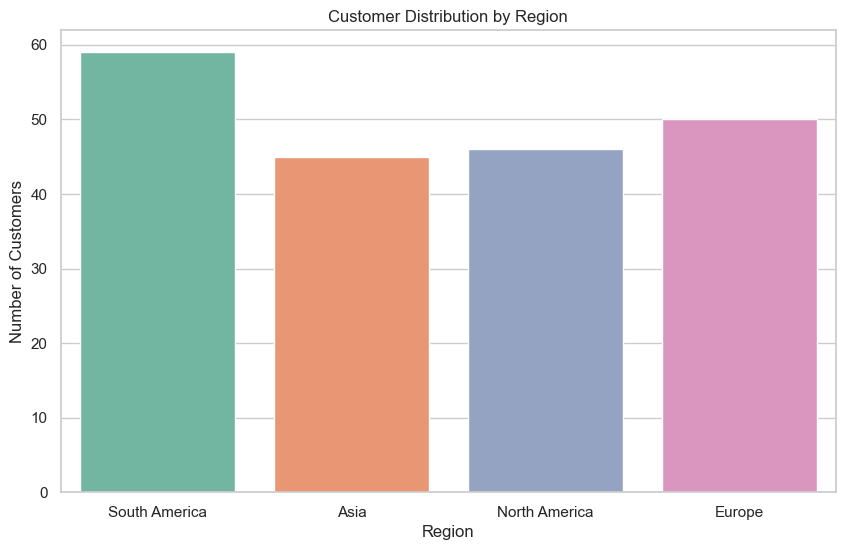

In [5]:
# Distribution of customers across different regions
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers_df, palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

/var/folders/8f/037qg2k901v7s6ptz20_k0jr0000gn/T/ipykernel_12376/2055374145.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products['TotalValue'], palette='Blues_d')


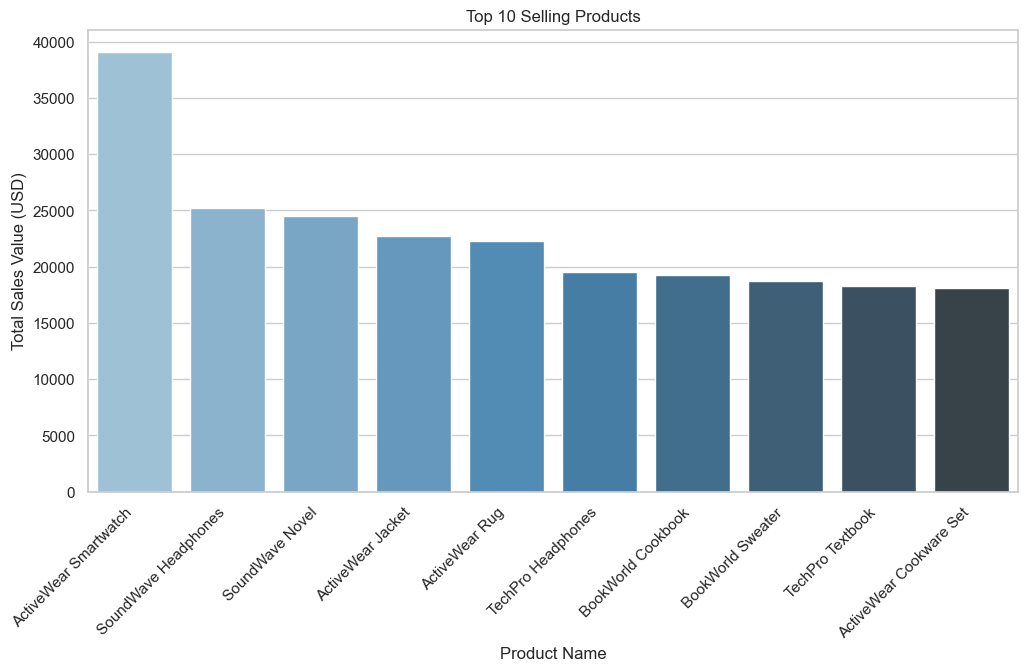

In [6]:
# Merge Transactions with Products
merged_data = transactions_df.merge(products_df, on='ProductID')
top_products = merged_data.groupby('ProductName').agg({'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False).head(10)

# Plot the top 10 selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products['TotalValue'], palette='Blues_d')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

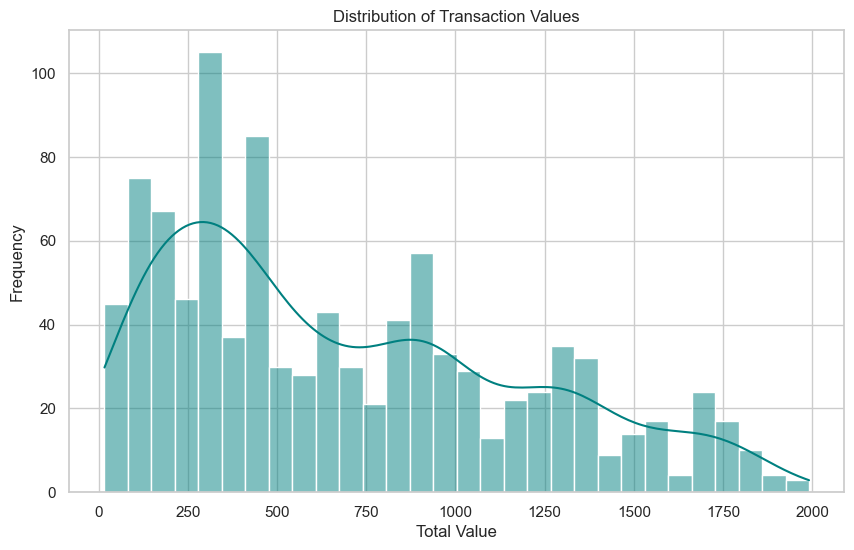

In [7]:
# Distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], kde=True, bins=30, color='teal')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

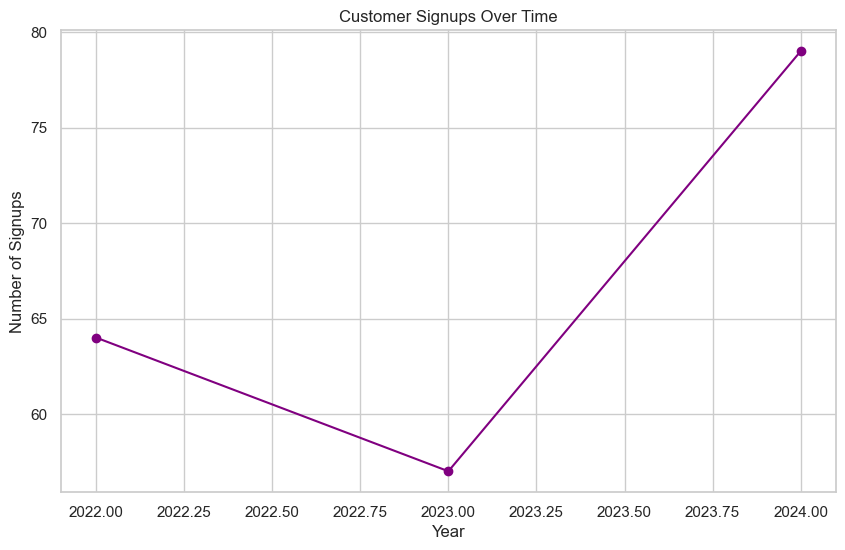

In [8]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Plotting the signup trend over time
plt.figure(figsize=(10, 6))
customers_df.groupby(customers_df['SignupDate'].dt.year).size().plot(kind='line', marker='o', color='purple')
plt.title('Customer Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

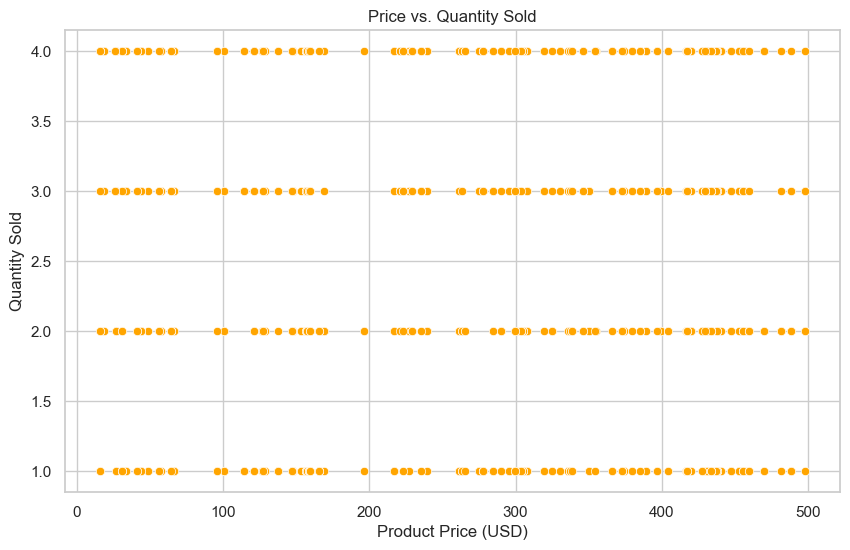

In [11]:
# Merge Transactions with Products
merged_data = transactions_df.merge(products_df, on='ProductID')

# Plot Price vs. Quantity Sold for each transaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_y', y='Quantity', data=merged_data, color='orange')
plt.title('Price vs. Quantity Sold')
plt.xlabel('Product Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()
